<a href="https://www.kaggle.com/code/mh0386/naive-bayes-with-normal-distribution?scriptVersionId=221958330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, y = make_classification(
    n_features=4, n_classes=2, n_samples=2000, n_informative=4, n_redundant=0
)

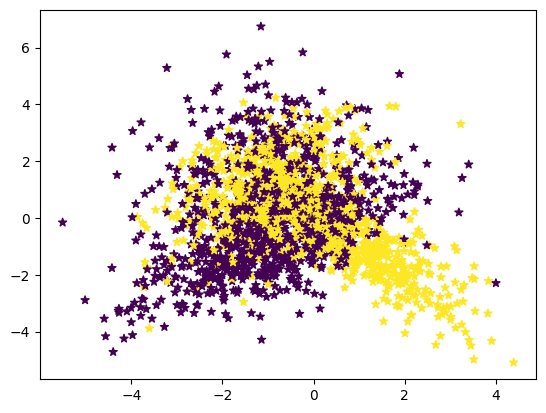

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y, marker="*")

In [4]:
x.shape, y.shape

((2000, 4), (2000,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1400, 4) (600, 4) (1400,) (600,)


# Naive Bayes from Built-in


In [7]:
classifier = GaussianNB()

In [8]:
classifier.fit(x_train, y_train)

GaussianNB()

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
accuracy_score(y_test, y_pred)

0.8183333333333334

In [11]:
f1_score(y_pred, y_test, average="weighted")

0.8188114315270285

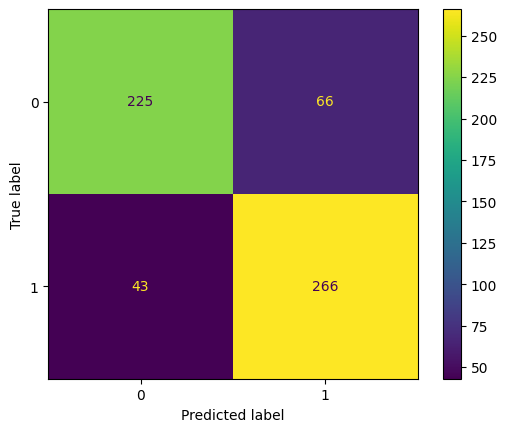

In [12]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred, labels=[0, 1]),
    display_labels=[0, 1],
).plot()

In [13]:
print(classification_report(y_test, y_pred, target_names=["class 0", "class 1"]))

              precision    recall  f1-score   support

     class 0       0.84      0.77      0.81       291
     class 1       0.80      0.86      0.83       309

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



# Naive Bayes from Scratch


In [14]:
class naive_bayes:
    def __init__(self):
        pass

    def fit(self, x, y):
        self.x, self.y = x, y
        self.classes = list(set(y))
        self.parameters = []
        for i, c in enumerate(self.classes):
            x_where_c = x[np.where(y == c)]
            self.parameters.append([])
            for col in x_where_c.T:
                self.parameters[i].append({"mean": col.mean(), "std": col.std()})

    def predict(self, x):
        self.prediction = []
        for row in x:
            probs = []
            for i, c in enumerate(self.classes):
                prob = len(self.y[self.y == c]) / len(self.y)
                for feature, param in zip(row, self.parameters[i]):
                    prob *= self.gaussian_prob(feature, param["mean"], param["std"])
                probs.append(prob)
            self.prediction.append(self.classes[np.argmax(probs)])
        return self.prediction

    def gaussian_prob(self, x, mean, std):
        return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(
            -((x - mean) ** 2) / (2 * std**2)
        )

In [15]:
model = naive_bayes()

In [16]:
model.fit(x_train, y_train)

In [17]:
y_pred = model.predict(x_test)

In [18]:
accuracy_score(y_test, y_pred)

0.8183333333333334

In [19]:
f1_score(y_pred, y_test, average="weighted")

0.8188114315270285

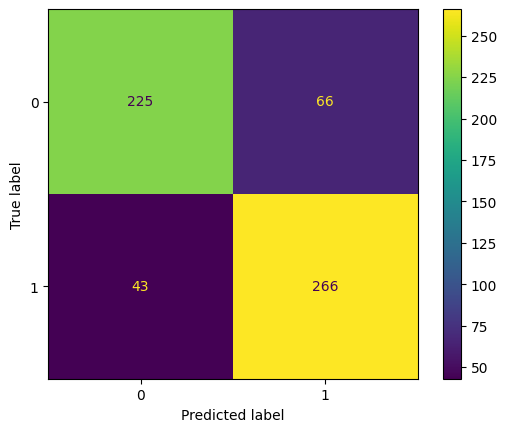

In [20]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred, labels=[0, 1]),
    display_labels=[0, 1],
).plot()

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       291
           1       0.80      0.86      0.83       309

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

